<a href="https://colab.research.google.com/github/yul77/hmkd1-2023/blob/main/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 피처(feature)? 속성?

피처는 데이터 세트의 일반 속성.
머신러닝은 2차원 이상의 다차원 데이터에서도 많이 사용되므로 타겟값을 제외한 나머지 속성을 모두 피처로 지칭

## 레이블, 클래스, 타겟값. 결정값

타겟값 또는 결정값은 지도 학습 시 데이터의 학습을 위해 주어지는 정답 데이터.
지도 학습 중 분류의 경우에는 이 결정값을 레이블 또는 클래스로 지칭

In [1]:
pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 71.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


분류 (Classification)는 대표적인 지도학습 방법의 하나.
### **지도학습이란**
명확한 답이 주어진 데이터를 먼저 학습 한 뒤, 미지의 정답을 예측하는 방식.
- 학습 데이터 세트/ 테스트 데이터 세트


In [2]:
# 데이터 세트 생성모듈
from sklearn.datasets import load_iris

#의사결정트리 분류모델 DecisionTreeClassifier
#분류 작업에서는 주로 범주형(class) 목표 변수를 예측하는 데 사용
from sklearn.tree import DecisionTreeClassifier as DTC

# 테스트 데이터와 학습 데이터를 분리
from sklearn.model_selection import train_test_split

In [3]:
iris =load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris.target_names)
iris.feature_names

['setosa' 'versicolor' 'virginica']


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- sepal length (cm)= 꽃받침 길이(cm)
- sepal width (cm)=  꽃받침 너비(cm)
- petal length (cm)= 꽃잎 길이(cm)
- petal width (cm) = 꽃잎 폭(cm)





In [5]:
# DataFrame으로 반환

import pandas as pd

iris = load_iris() # 붓꽃 데이터셋 로딩

iris_data = iris.data
# iris.data는 iris 데이터세트에 피쳐만으로 된 데이터를 numpy로 가지고 있다.

# iris.target은 붓꽃데이터 세트에서 레이블(결정값) 데이터를 numpy로 가지고 있다.
iris_label = iris.target
print('iris target 값:',iris_label,'\n')
print('iris target 명:', iris.target_names)

#붓꽃 데이터세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame( data = iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

# 0은 세토사, 1은 베르시칼라, 2는 버지니카를 의미
# 즉, 각 샘플이 어떤 종류의 붓꽃에 속하는지를 나타내는 정보
# 1~ 50번째까지는 세토사, 51~100번째까지는 베르시칼라, 101~150번째까지는 버지니카 = 총 150개

iris target 값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] 

iris target 명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [6]:
iris_df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
# 학습용 데이터와 테스트 데이터 분리
# test_size=0.2 는 테스트 데이터가 20%, 학습데이터가 80%의 비중으로 분할된다는 의미.
# random_state=11 은 호출할 때마다 주어지는 난수 발생값.= seed값과 동일한 역할.

X_train, X_test, y_train,y_test = train_test_split(iris_data, iris_label,
                                                   test_size=0.2, random_state=11)

# X_train( 학습용 '피처' 데이터 세트)  /  y_train( 학습용 '레이블' 데이터 세트)
# X_test( 테스트용 '피처' 데이터 세트) /  y_test( 테스트용 '레이블' 데이터 세트)

In [8]:
len(X_train) # 학습용 피처 데이터세트의 크기 80%

120

In [9]:
len(X_test) # 테스트 피쳐 20%

30

In [10]:
# DecisionTreeClassifier 객체 생성

dt_clf = DTC(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)  # 학습 데이터 기반으로 학습 완료

DecisionTreeClassifier(random_state=11)

In [11]:
# DTC 객체를 이용해 예측 수행
# 예측은 반드시 학습데이터가 아닌 다른 데이터 이용. (테스트 데이터 사용)
# predict() 메소드 : 힉습된 모델 기반에서 테스트 데이터 세트에 대한 예측값 반환

pred = dt_clf.predict(X_test) # = 예측 레이블 데이터 세트

In [12]:
# 의사 결정 트리 기반의 DTC 예측 성능 평가. = 정확도 측정(예측값과 실제 레이블 값이 얼마나 일치하는지 평가하는 지표)
# accuracy_score() 정확도 측정 함수.
# accuracy_score(실제 레이블 데이터 세트, 예측 레이블 데이터 세트)

from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


### 위 붓꽃 데이터 세트 분류를 예측한 프로세스
- 데이터 세트 분리: 데이터를 학습 데이터와 테스트 데이터로 분리
- 모델 학습: 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습
- 예측 수행: 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류)를 예측합니다
- 평가: 이렇게 예측된 결과값과 테스트 데이터의 실제 결과값을 비교해 ML모델 성능을 평

## Estimator 이해 및 fit(),predict() 메서드
- fit() : ML모델 학습
- predict(): 학습된 모델 예측


Classifier (분류) +  Regressor (회귀) = Estimator(평가자) 클래스

- decomposition (피처 처리 & 차원 축소)
: 차원 축소와 관련한 알고리즘을 지원하는 모듈.  = 차원축소기능 수행
  - from sklearn.decomposition import PCA
  - from sklearn.decomposition import NMF
  - from sklearn.decomposition import Truncated SVD

- cluster (ML 알고리즘)
: 비지도 클러스터링 알고리즘 제공 (K-평균,계층형, DBSCAN등)
  - from sklearn.cluster import KMeans
-
tree (ml 알고리즘)
:의사결정 트리 알고리즘 제공
  - from sklearn.tree import DecisionTreeClassifier # (분류)
  - from sklearn.tree import DecisionTreeRegressor # (회귀)

- metrics (평가)
: 분류, 회귀, 클러스터링, 페어와이즈에 대한 다양한 성능 측정 방법 제공
  - from sklearn.metrics import accuracy_score
  - from sklearn.metrics import mean_squared_error
  - from sklearn.metrics import r2_score
  - from sklearn.metrics import silhouette_samples, silhouette_score
  - from sklearn.metrics import roc_auc_score

- datasets ( 예제 데이터)
: 사이킷 런에 내장된 예제 제공 데이터 세트 생성 모듈
  - from sklearn import datasets
  - from sklearn.datasets import load_iris
    - 분류용
      - datasets.load_iris() # 붓꽃데이터
      - datasets.load_digits() # 0~9까지 숫자의 이미지 픽셀 데이터 세트
      - datasets.load_breast_cancer()  # 위스콘신 유방암 피처들과 악성/음성 데이블 데이터 세트
    - 회귀용
      - datasets.load_boston() : 미국 보스텀의 집 피처들과 가격에 대한 데이터 세트
      - datasets.load_diabetes() : 당뇨 데이터 세트

- pipeline (유틸리티)
: 피처 처리등의 변환과 ML알고리즘 학습, 예측 등을 함께 묶어서 실행할 수 있는 유틸리티 제공
  - from sklearn.pipeline import Pipeline

- preprocessing (피처처리)
 : 데이터 전처리에 필요한 다양한 가공 기능 제공(인코딩/정규화/스케일링 등)
  - from sklearn.preprocessing import LabelEncoder
  - from sklearn.preprocessing import OneHotEncoder, LabelEncoder
  - from sklearn.preprocessing import OneHotEncoder
  - from sklearn.preprocessing import MinMaxScaler
  - from sklearn.preprocessing import PolynomialFeatures
  - from sklearn.preprocessing import StandardScaler as SS
  - from sklearn.preprocessing import scale

- model_selection (데이터 분리,검증& 파라미터 튜닝)
:학습/검증/예측 데이터로 데이터를 분리/평가하기 위한 모듈 모음
  - from sklearn.model_selection import train_test_split # (분리함수)
  - from sklearn.model_selection import StratifiedKFold as SKF
  - from sklearn.model_selection import GridSearchCV # 하이퍼파라미터 튜닝 지원
  - from sklearn.model_selection import KFold
  - from sklearn.model_selection import cross_val_score # 평가함수
  - from sklearn.model_selection import train_test_split

linear_model ( ML알고리즘)
: 주로 선형 회귀, 릿지,라쏘,로지스틱 회귀 등과 SGD 관련 알고리즘 제공.
from sklearn.linear_model import Ridge #회귀
from sklearn.linear_model import Lasso #회귀
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression #회귀

ensemble(ML알고리즘)
: 앙상블 알고리즘 제공.
-랜덤포레스트, 에이더 부스트, 그래디언트 부스팅 등 제공
from sklearn.ensemble import RandomForestRegressor   #회귀
from sklearn.ensemble import RandomForestClassifier #분류
from sklearn.ensemble import GradientBoostingRegressor # 회귀

SVM(ML알고리즘)
: 서포트 벡터 머신 알고리즘 제공

naive_bayes (ML알고리즘)
: 다이브 베이즈 알고리즘 제공. 가우시안NB.다항분포 NB등

neighbors (ML알고리즘)
: 최근접 이웃 알고리즘 제공. K-NN 등

from xgboost import XGBRegressor

from lightgbm import LGBMRegressor


- data = 피쳐의 데이터 세트 [넘파이배열]
- target = 분류시 레이블 값, 회귀일 때는 숫자 결과값 데이터 세트[넘파이배열]
- target_names = 개별 레이블 이름 [넘파이배열 or list타입]
- feature_names = 피처 이름[넘파이배열 or list타입]
- DESCR = 데이터 세트에 대한 설명과 각 피처의 설명  [스트링 타입]

In [13]:
# 붓꽃데이터 생성

from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))
# Bunch' 클래스는 파이썬 딕셔너리 자료형과 유사

<class 'sklearn.utils.Bunch'>


In [14]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:',keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [15]:
print('\n feature_names 의 타입:', type(iris_data.feature_names))
print('\n feature_names 의 shape:', len(iris_data.feature_names))
print('\n',iris_data.feature_names)

print('\n target_names 의 shape:', len(iris_data.target_names))
print('\n',iris_data.target_names)

print('\n data의 타입: ',type(iris_data.data))
print('\n data의 shape:',iris_data.data.shape,'\n')
print(iris_data['data'])

print('\n target의 타입:',type(iris_data.target))
print('target의 shape:',iris_data.target.shape)
print(iris_data.target)


 feature_names 의 타입: <class 'list'>

 feature_names 의 shape: 4

 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 shape: 3

 ['setosa' 'versicolor' 'virginica']

 data의 타입:  <class 'numpy.ndarray'>

 data의 shape: (150, 4) 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [

## train_test_split()
학습/테스트 데이터 세트 분리
- train_test_split(피처 데이터 세트, 레이블 데이터 세트,선택옵션)
  - **test_size** : 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링 할 것인가 결정. (디폴트 = 0.25 즉, 25%)
  - **train_size** : 학습용 데이터 세트 크기를 얼마로 샘플링 할 것인지 결정.
  - **suffle** : 데이터 분리전 미리 섞을지 결정. 디폴트 True.데이터를 분산시켜 더 효율적인 학습 및 테스트 데이터 만드는데 도움
  - **random_state** : seed와 같은 역할. 랜덤 수 고정.
  - **train_test_split()**: 반환값은 튜플. 순차적으로 학습용 피처세트 > 테스트용 피처세트 > 학습용 레이블 세트 > 테스트용 레이블 세트로 반환됨



In [16]:
# DecisionTreeClassifier 학습
from sklearn.tree import DecisionTreeClassifier as DTC# (분류)
from sklearn.metrics import accuracy_score #평가
from sklearn.datasets import load_iris #데이터 소환
from sklearn.model_selection import train_test_split #분리,검증& 파라미터 튜닝

dt_clf = DTC()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, \
                                                    test_size = 0.3, random_state = 121)

In [17]:
# 예측 정확도 측정
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

#정확도가 높기는 하나 테스트 데이터가 30%(45개)밖에 되지 않으므로 성능을 판단하기에 적절하지 못함.

예측 정확도: 0.9556


In [18]:
# K-fold 교차 검증

from sklearn.tree import DecisionTreeClassifier as DTC #분류
from sklearn.metrics import accuracy_score # 평가
from sklearn.model_selection import KFold # 분리, 검즘, 파라미터튜닝
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DTC(random_state = 156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold (n_splits = 5) #n_splits = 5 로 객체 생성. 붓꽃데이터를 5개의 폴드 데이터 세트로 분리.(학습 4/5, 검증 1/5)
cv_accuracy = [] # 평균구해서 담아줄 곳
print('붓꽃 데이터 세트 크기:', features.shape[0])


붓꽃 데이터 세트 크기: 150


In [19]:
# split()이 어떤 값을 실제로 반환하는지 확인해보기 위해 검증 데이터 세트의 인덱스도 추출

n_iter = 0 # 반복횟수를 기록하기 위한 변후 초기화

#  kfold.split() 함수를 사용하여 학습 데이터와 검증 데이터의 인덱스를 반환
#  반복문을 통해 각 폴드에 대해 학습과 검증을 수행

for train_index, test_index in kfold.split(features): #5번 반복됨

  # 학습 데이터의 특성(features)과 검증 데이터의 특성을 나누어 가져옵니다.
  X_train, X_test = features[train_index], features[test_index]

  # 학습 데이터의 레이블(label)과 검증 데이터의 레이블을 나누어 가져옵니다.
  y_train, y_test = label[train_index], label[test_index]

  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1

  #반복시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n # {0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'
  .format(n_iter, accuracy, train_size, test_size))

  print('# {0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

#개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n ## 평균 검증 정확도: ', np.mean(cv_accuracy))


 # 1 교차 검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
# 1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

 # 2 교차 검증 정확도 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
# 2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

 # 3 교차 검증 정확도 : 0.8667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
# 3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

 # 4 교차 검증 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
# 4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

 # 5 교차 검증 정확도 : 0.7333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
# 5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

 ## 평균 검증 정확도:  0.9


In [20]:
# Stratified K 폴드
# 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K폴드 방식

import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [21]:
# 이슈가 발생하도록 3개의 폴드세트를 KFold로 생성

kfold = KFold(n_splits=3)
n_iter = 0

for train_index , test_index in kfold.split(iris_df):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print(' ## 교차 검증: {0}'.format(n_iter),'\n')
  print('▶학습◀ 레이블 데이터 분포 : \n ', label_train.value_counts(),'\n')
  print('▶검증◀ 레이블 데이터 분포: \n', label_test.value_counts(),'\n\n')

# 이런 유형으로 교차 검증 데이터 세트를 분할하면 검증 예측 정확도는 0이 된다.

 ## 교차 검증: 1 

▶학습◀ 레이블 데이터 분포 : 
  1    50
2    50
Name: label, dtype: int64 

▶검증◀ 레이블 데이터 분포: 
 0    50
Name: label, dtype: int64 


 ## 교차 검증: 2 

▶학습◀ 레이블 데이터 분포 : 
  0    50
2    50
Name: label, dtype: int64 

▶검증◀ 레이블 데이터 분포: 
 1    50
Name: label, dtype: int64 


 ## 교차 검증: 3 

▶학습◀ 레이블 데이터 분포 : 
  0    50
1    50
Name: label, dtype: int64 

▶검증◀ 레이블 데이터 분포: 
 2    50
Name: label, dtype: int64 




In [22]:
# StratifiedKFold 교차 검증
# 위와 같이 kfold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결해준다.
# split()에서드에 인자로 피처 데이터 셋 뿐 아니라 레이블 데이터 세트 값도 반드시 필요함.(kfold는 레이블 없어도 됨)

from sklearn.model_selection import StratifiedKFold as SKF

skf = SKF(n_splits = 3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print(' ## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포: \n', label_train.value_counts())
  print('검증 레이블 데이터 분포: \n', label_test.value_counts(),'\n\n')

 ## 교차 검증: 1
학습 레이블 데이터 분포: 
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    17
1    17
2    16
Name: label, dtype: int64 


 ## 교차 검증: 2
학습 레이블 데이터 분포: 
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    17
2    17
1    16
Name: label, dtype: int64 


 ## 교차 검증: 3
학습 레이블 데이터 분포: 
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 1    17
2    17
0    16
Name: label, dtype: int64 




In [23]:
# StratifiedKFold를 이용해 데이터 분리

dt_clf = DTC(random_state = 156)

skfold = SKF(n_splits = 3)
n_iter = 0
cv_accuracy = []

for train_index, test_index in skfold.split(features,label):
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  n_iter += 1
  accuracy = np.round(accuracy_score(y_test, pred),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print(' \n # {0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기 : {3}'
  .format(n_iter, accuracy, train_size, test_size))

  print('# {0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print( ' \n ## 교차 검증별 정확도: ', np.round(cv_accuracy, 4))
print( '## 평균 검증 정확도: ', np.round(np.mean(cv_accuracy),4))

# 평균 검증 정확도가 약 96.67% 측정됨
# 왜곡된 레이블 데이터 세트에서는 반드시 Straarified K폴드를 이용해 교차 검증해야 함.+ 분류에서도 마찬가지.
# 회귀에서는 지원되지 않음. (= 회귀 결정값은 연속된 숫자값이기 때문에 결정값별 분포를 정하는 의미가 없음.)

 
 # 1 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기 : 50
# 1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]
 
 # 2 교차 검증 정확도: 0.94, 학습 데이터 크기: 100, 검증 데이터 크기 : 50
# 2 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]
 
 # 3 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기 : 50
# 3 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
 
 ## 교차 검증별 정확도:  [0.98 0.94 0.98]
## 평균 검증 정확도:  0.9667


## cross_val_score() 교차 검증

- cross_val_score(estimator, X, y=None, socring = None, n_jobs = 1, verbose = 0, fit_params = None, pre_dispatch = '2*n_jobs')
  - estimator, X, y,socring, cv가 주요 파라미
  - estimator: Classifier(분류) 또는 Regressor(회귀)를 뜻함.
  - X  : 피처 데이터 세트
  - y : 레이블 데이터 세트
  - scoring : 예측 성능 평가 지표
  - cv : 교차 검증 폴수 수


- cross_val_score()는 분류일땐 Stratified K폴드 방식 / 회귀일 때는 K 폴드 방식으로 분할한다.

In [24]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import cross_val_score, cross_validate

iris_data =load_iris()
dt_clf = DTC(random_state = 156)

data = iris_data. data
label = iris_data. target

# accuracy = 정확도
scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv=3)
print('교차 검증별 정확도: ',np.round(scores, 4))
print(' 평균 검증 정확도:', np.round(np.mean(scores),4))

# fit(학습), predict(예측), evaluation(평가)

교차 검증별 정확도:  [0.98 0.94 0.98]
 평균 검증 정확도: 0.9667


# cross_val_score와 cross_validate의 차이
### cross_val_score는 단 하나의 평가 지표만 가능
### cross_validate 여러개의 평가 지표를 반환

-
cross_val_score 함수는 단일 평가 지표에 대한 성능 점수만 반환합니다.
간단한 사용법으로, 모델, 특성 데이터, 타깃 데이터, 평가 지표 등을 인자로 받아 교차 검증을 수행하고, 각 폴드에서의 평가 점수를 리스트 형태로 반환합니다.
주로 간편하게 모델의 성능을 평가하고자 할 때 사용됩니다.

- cross_validate 함수는 cross_val_score보다 더 유연한 기능을 제공합니다.
cross_validate 함수는 다중 평가 지표와 추가적인 정보를 반환합니다.
평가 지표 외에도 훈련 시간, 테스트 시간, 훈련 점수 등의 정보를 반환할 수 있습니다.
return_train_score 매개변수를 사용하여 훈련 점수를 반환할지 여부를 지정할 수 있습니다.
여러 지표를 비교하거나 훈련 시간 등의 추가 정보를 필요로 할 때 사용됩니다.

기본적으로 cross_val_score와 cross_validate 함수는 같은 교차 검증 방법을 사용합니다. 다만 cross_validate는 더 다양한 결과를 제공하며, 추가적인 기능을 활용할 수 있습니다. 따라서 사용 목적에 따라 적절한 함수를 선택하여 사용하면 됩니다.

# GridSearchCV -교차 검증과 최적 하이퍼 파라미터 튜닝을 한번에

하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소.
<br>이 값을 조정해 알고리즘의 예측 성능을 개선 할 수 있다.

- 데이터 세트를 cross-vaidation을 위한 학습/테스트 세트로 자동분할한 뒤 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용 = 최적 파라미터를 찾을 수 있게 해






GridSearchCV 클래스의 파라미터

- **estimator** : classifier, regressor, pipeline
- **param_grid** : key+리스트 값을 가지는 딕셔너리가 주어짐. estimator의 튜닝을 위해 파라미터 명과 사용될 여러가지 파라미터 값을 지정.
- ** scoring **: 예측 성능을 측정할 평가 방법을 지정.  

In [25]:
# 결정 트리 알고리즘의 여러 하이퍼 파라미터를 순차적으로 변경하면서
# 최고 성능을 가지는 파라미터 조합을 찾고자 한다면
# 다음과 같이 파라미터 집합을 만들고 이를 순차적으로 적용하면서 최적화 수행

grid_parameters = {'max_depth': [1,2,3],
                   'min_samples_split':[2,3]}

In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier as DTC # (분류)
from sklearn.model_selection import GridSearchCV ,train_test_split # 하이퍼파라미터 튜닝. 평가
from sklearn.metrics import accuracy_score # 평가

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)
#시간될때 iris_data.data, iris_data.target, 이거 어디서 손봤는지 확인하기

dtree = DTC()

parameters = {'max_depth':[1,2,3],'min_samples_split':[2,3]}

In [27]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정
# refit=True가 디폴트. 가장 좋은 파라미터 설정으로 재 학습 시킴
# return_train_score=True 는 생략가능. warnning 예방용도인듯?

grid_dtree = GridSearchCV( dtree, param_grid= parameters, cv=3, refit=True, return_train_score=True )
grid_dtree.fit(X_train, y_train)

#  GridSearchCV 결과를 추출해 데이터프레임으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score', 'split0_test_score','split1_test_score','split2_test_score']]

# 6개의 결과 반환
# params컬럼 = 수행할때마다 적용된 하이퍼 파라미터 값
# 4번 행의 rank_test_score가 1이라는건 예측성능이 1위하는 의미 = 5번도 공동 1위
# mean_test_score 총 수행한 평가 평균값.

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [28]:
# GridSearchCV 객체의 fit()을 수행하면 최고 성능을 나타낸 하이퍼 파라미터 값과 그때의 평가 결과값이
# best_params_, best_score_에 기록된다.

print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dtree.best_score_))


# 최적 성능을 나타내는 하이퍼 파라미터로 Estimator를 학습해 best_estimator_로 저장

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9750


In [29]:
# best_estimator_로 train_test_split()으로 분리된 테스트 데이터 세트에 대해 예측하고 성능을 평가

estimator = grid_dtree.best_estimator_

# GridSearchCV의  best_estimator_ 는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도 : 0.9667


일반적으로 학습데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤 별도의 테스트 세트에서 이를 평가하는 것이 일반적인 머신러닝 적용방법

# 데이터 전처리

### 데이터 인코딩
- 레이블 인코딩
  - 카테고리 피쳐를 코드형 숫자값으로 변환( '01','02'와 같은 값 역시 문자열이므로 1,2와 같은 숫자형 값으로 변환)
  - **LabelEncoder** 클래스로 구현.
  - **LabelEncoder**를 객체로 생성 후 fit(),과 transform()을 호출해 레이블 인코딩 수행

- 원-핫 인코딩
  - OneHotEncoder 클래스
  - fit(),과 transform()을 이용하여 변환. 인자로 2차원 ndarray 입력 필요. Sparse(희소행렬) 배열 형태로 변환되므로 toarray()를 적용하여 다시 Dense(밀집)형태로 변환 되어야 함.
  - pd.get_dummies(DataFrame)을 이용

In [30]:
# 레이블 인코딩

from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서'] # 이걸 숫자로 변경

encoder = LabelEncoder()
encoder.fit(items) # fit사용 이유: 각 고유한 값에 대해 숫자로 매핑할 인덱스를 결정( 인코딩 변환 기준 학습)
labels = encoder.transform(items) # fit 메서드에서 학습한 기준을 바탕으로 items의 값들을 인코딩된 숫자 값으로 변환

print('인코딩 변환 값:',labels)
print('인코딩 클래스:', encoder.classes_)  #원본의 이름을 알 수 있음.

인코딩 변환 값: [0 1 4 5 3 3 2 2]
인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [31]:
# 인코딩-> 디코딩 하는 방법 (inverse_transform)

print('디코딩 원본 값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [32]:
 # 원-핫 인코딩
 from sklearn.preprocessing import OneHotEncoder as OHE
 import numpy as np

 items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

 # 2차원 ndarray로 변환.
 items = np.array(items).reshape(-1,1)

 # 원-핫 인코딩을 적용
 oh_encoder = OHE()
 oh_encoder.fit(items)
 oh_labels = oh_encoder.transform(items)
print('희소행렬상태: \n',oh_labels,'\n')

 # 원-핫 인코더로 변환한 결과는 희소행렬(Sparse)이므로 toarray()를 이용해 밀집행렬(Dense)로 변환
 # toarray() 메서드를 사용하여 희소 행렬을 일반적인 배열로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())

print('\n','원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

희소행렬상태: 
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0 

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]

 원-핫 인코딩 데이터 차원
(8, 6)


In [33]:
# 위의 코드를 짧게 만드는 법 = pandas의 get_dummies() 함수를 사용한다.

import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
df

,item
0,TV
1,냉장고
2,전자레인지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [34]:
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [35]:
ohe_df= pd.get_dummies(df)
display(ohe_df)

# item컬럼을 기반으로 하기 때문에 item_TV	item_냉장고	item_믹서	item_선풍기	item_전자레인지	item_컴퓨터
# 이렇게 출력됨

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


# 피쳐 스케일링과 정규화

서로다른 변수의 값 범위를 일정한 수준으로 맞추는 작업 = 피처 스케일링
- 표준화: 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규분포를 가진 값으로 변환하는 것.
- 정규화: 서로 다른 피처의 크기를 통일하기 위해 크기를 변환.

사이킷런과 일반적인 정규화는 약간의 차이가 있다. <br>
사이킷런 Nomalizer 모듈은 선형대수에서의 정규화 개념이 적용됐으며, 개별 벡터의 크기를 맞추게 위해 변환하는 것을 의미.<br>
= 개별 벡터를 모든 벡터의 크기로 나눠줌
<br>
<br>
혼선 방지를 위해 일반적인 의미의 표준화/정규화를 '피처 스케일링' <br>
선형대수 개념의 정규화를 '벡터 정규화'로 지칭

### StandardScaler
개별 피처를 평균이 0이고, 분산이 1인 정규분포 형태로 변환.

In [36]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽆 데이터세트로 로딩하고 데이터 프레임으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns= iris.feature_names)

print('feature 들의 평균값')
print(iris_df.mean(),'\n')

print('feature 들의 분산값')
print(iris_df.var())

feature 들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64 

feature 들의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [37]:
# 위 데이터를 StandardScaler로 표준화

from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터셋 변환. fit()과 transform()호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarray로 반환 되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature 들의 평균값')
print(iris_df_scaled.mean(),'\n')

print('feature 들의 분산값')
print(iris_df_scaled.var())

# 모든 칼럼값의 평균이 0에 아주 가까운 값으로, 분산이 1에 가까운 값으로 변환 되었다.

feature 들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64 

feature 들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

iris_df_scaled = scaler.fit_transform(iris_df) # fit과 transform을 한방에 해도 됨

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature 들의 평균값')
print(iris_df_scaled.mean(),'\n')

print('feature 들의 분산값')
print(iris_df_scaled.var())

feature 들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64 

feature 들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


## MinMaxScaler
데이터값을 0과 1 사이의 범위 값으로 변환.(음수값이 있으면 -1에서 1값으로 변환합니다.)


In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환 된 데이터셋이 numpy ndarray로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns= iris.feature_names)
print('feature들의 최소값')
print(iris_df_scaled.min(),'\n')

print('최대값')
print(iris_df_scaled.max())

feature들의 최소값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64 

최대값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### Scaler를 이용하여 학습 데이터와 테스트 데이터에 fit(), transform(), fit_transform() 적용 시 유의사항.

- 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 데이터로 분리
- 그게 어려운 상황이라면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler객체를 이용해 transform()으로 변환

In [40]:
# 126p 참고
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

In [41]:
scaler = MinMaxScaler()

scaler.fit(train_array)

train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('scale된 train_array데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [42]:
scaler.fit(test_array)

test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [43]:
sclaer = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('scale된 train_array데이터:', np.round(train_scaled.reshape(-1),2))

# test_array에 Scale변환을 할 때는 반드시 transform()만으로 변환 해야함. = fit() 호출 X
# 학습을 시킨것을 결과로 test를 진행해야하는데 test에도 fit을 하면 테스트 값 기준으로 다시 학습해서 출력하게된다.
# = test_data에서는 fit_transform() 절대 사용 하면 안됨.

test_scaled = scaler.transform(test_array)
print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터: [0 1 2 3 4 5]
scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


# 사이킷 런으로 수행하는 타이타닉 생존자 예측

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [45]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [46]:
titanic3= '/content/drive/MyDrive/머신러닝/titanic_train.csv'
titanic_df = pd.read_csv(titanic3)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [47]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [48]:
# null값 처리

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True) # 나이컬럼의 null값은 나이의 평균 값으로 대체
titanic_df['Cabin'].fillna('N', inplace = True) #카빈과 엠바크의 null값은 N 처리 한다.
titanic_df['Embarked'].fillna('N',inplace = True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum()) # null값이 있는지 확인.

데이터 세트 Null 값 개수 0


In [49]:
# 나머지 문자열 피처 Sex, Cabin.Embarked 의 값 분류 살펴보기
print(' Sex 값 분포: \n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n',titanic_df['Cabin'].value_counts())
print('\n Embarked값 분포:\n', titanic_df['Embarked'].value_counts())

 Sex 값 분포: 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [50]:
# Cabin(선실)의 경우 N이 687건이나 된다.
# 선실 등급을 나타내는 첫번째 알파벳이 중요해보인다
# Cabin 속성의 경우 앞 문자만 추출해본다.

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [51]:
# 성별에 따른 생존자 수를 비교해 보자

titanic_df.groupby(['Sex','Survived'])['Survived'].count()
# 0은 사망, 1은 생존
# = 여자 74.2% 생존. 남자 18.8% 생존

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

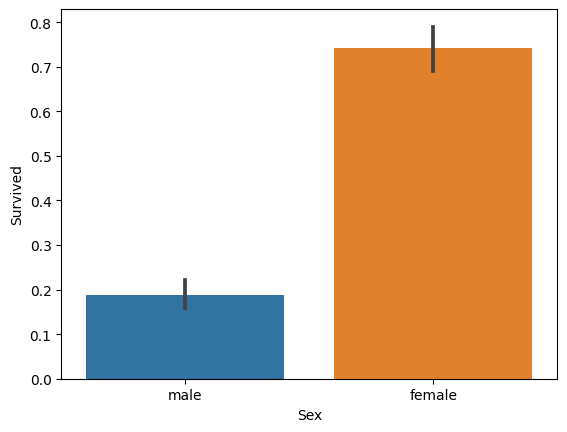

In [52]:
# 성별에 따른 생존비율 시각화하기
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

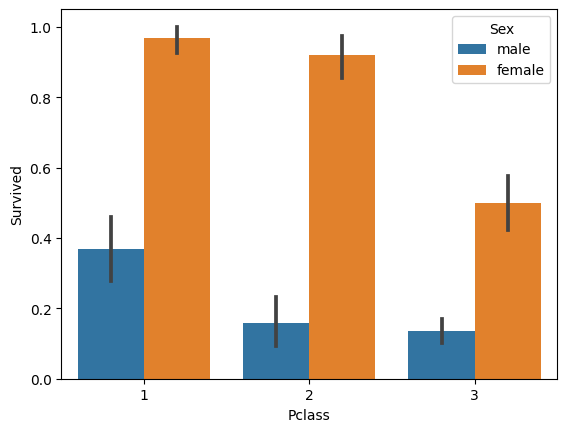

In [53]:
# 빈부 격차와 성별에 따른 생존율 시각화

sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

# 여성의 경우 3등실의 생존율이 상대적으로 저조하다.
# 남성의 경우 1등실의 생존율이 압도적으로 높은 것을 알 수 있다.

In [54]:
# Age에 따른 생존율

# 1) 입력 age에 따라 구분값을 반환하는 함수 설정.
def get_category(age):
  cat = ''
  if age <= -1 : cat = 'Unknown' # -1 이하는 오류값
  elif age <= 5: cat = 'Baby' # 5세 이하는 아기
  elif age <= 12: cat = 'Child' # 12세 이하는 어린이
  elif age <= 18: cat = 'Teenager' # 18세 이하는 청소년
  elif age <= 25: cat = 'Student' # 25세 이하는 학생
  elif age <= 35: cat = 'Young Adult' # 35세 이하는 청년
  elif age <= 60: cat = 'Adult' # 성인
  else : cat = 'Elderly' #노인

  return cat

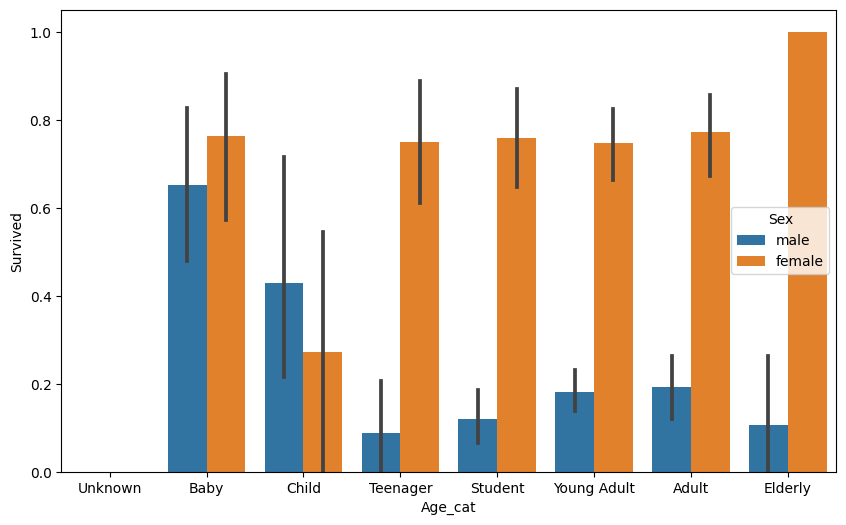

In [55]:
# 2) 시각화 하기

plt.figure(figsize = (10,6))

# x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
# get_category(X)는 입력값으로 'Age' 칼럼값을 받아서 해당하는 cat반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)
titanic_df.drop('Age_cat',axis = 1, inplace = True)

# 아기들은 비교적 생존 확률이 높음
# 여자아이들은 다른 연령대에 비해 생존 확률이 낮았음.
# 할머니들의 생존률이 매우 높았음.

# =  성별, 나이, 좌석등급이 생존에 영향력이 큰 피처임을 알 수 있다.

In [56]:
# 문자열 카테고리 피쳐를 인코딩 해보자 ( = 레이블 인코딩 사용)
# 레이블 인코딩 = 카테고리 값의 유형 수에 따라 0~(카테고리 유형 수 -1)까지의 숫자 값으로 변환

from sklearn.preprocessing import LabelEncoder # 레이블 인코더 소환

# encode_Features() 함수 생성
def encode_features(dataDF):
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

# ['Cabin','Sex','Embarked'] 의 속성이 숫자형으로 바뀌었다.



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


**transform_featurs()**
<br>데이터 전처리를 전체적으로 호출하는 함수는 transform_featurs()이며 Null처리, 불필요한 피처 제거, 인코딩을 수행하는 내부 함수로 구성
 - 불필요한 피쳐 제거는 drop_features(df)
 - 불필요한 단순 식별자 수준인 passengerID, Name, Ticket피처를 제거한

In [57]:
#  Null처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace = True)
  df['Cabin'].fillna('N', inplace = True)
  df['Embarked'].fillna('N', inplace = True)
  df['Fare'].fillna(0, inplace = True)
  return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'], axis=1, inplace= True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature]= le.transform(df[feature])
  return df

# transform_featurs() 함수 생성
# 앞에서 설정한 데이터 전처리 함수 호출
def transform_featurs(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [58]:
#  transform_featurs() 함수로 원본데이터 가공해보기

# 1) 원본 데이터 재 로딩
titanic_df = pd.read_csv(titanic3)

# 2) Survived 속성만 분리해 클래스 [결정값 데이터세트] 만들기
y_titanic_df = titanic_df['Survived']

# 3) Survived 속성을 드롭해 [피처 데이터세트] 생성
X_titanic_df = titanic_df.drop('Survived',axis= 1)

# 4) 생성된 피처 데이터세트에  transform_featurs() 적용해 데이터 가공
X_titanic_df =  transform_featurs(X_titanic_df)


In [59]:
# 내려받은 학습데이터세트를 기반으로 train_test_split()을 이용해 테스트 데이터세트를 추출
# 테스트 데이터 사이즈 크기는 전체의 20%로 한다

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state = 11)

In [60]:
# 결정트리, 랜덤포레스트, 로지스틱회귀를 이용해 타이타닉 생존자 예측하기.
# train_test_split()으로 분리된 학습|테스트 데이터를 기반으로 학습하고(fit), 예측한다(predict).
# 예측 성능 평가는 정확도로 한다. => accuracy_score() 사용

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score

# 결정트리, 랜덤포레스트, 로지스틱 회귀를 위한 사이킷런 분류(Classifier) 클래스 생성
dt_clf = DTC(random_state = 11)
rf_clf = RFC(random_state = 11)
lr_clf = LR(solver = 'liblinear')

# DecisionTreeClassifier 학습/ 예측/ 평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

# RandomForestClassifire 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test,lr_pred))) # 타 알고리즘에 비해 높은 정확도 발생

# 하지만 최적화 작업 전이고, 데이터양도 충분하지 않기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가 할 수 없음.

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8659


In [61]:
# 교차검증으로 결정 트리 모델을 좀 더 평가해보기.

# 1) KFold 클래스 이용


from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
  # 폴드 세트를 5개인 KFold객체 생성, 폴드 수만큼 예측경과 저장을 위한 리스트 객체 생성.
  kfold = KFold(n_splits = folds)
  scores = []

  # KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

    #Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

  # 5개 fold에서의 평균 정확도 계산.
  mean_score = np.mean(scores)
  print('평균 정확도: {0:.4f}'.format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf, folds =5)

# 평균 정확도는 78.23%

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [62]:
# 2) cross_val_score() 이용

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print('교차 검증{0} 정확도: {1:.4f}'.format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

# cross_val_score()와 KFold의 평균 정확도가 다른 이유
# = cross_val_score()가 StratifiedKFold를 이용해서 폴드 세트를 분할하기때문.

교차 검증0 정확도: 0.7430
교차 검증1 정확도: 0.7753
교차 검증2 정확도: 0.7921
교차 검증3 정확도: 0.7865
교차 검증4 정확도: 0.8427
평균 정확도: 0.7879


In [65]:
# 3) GridSearchCV 이용
# CV는 5개의 폴드세트 지정
# 하이퍼 파라미터는 max_depth, min_samples_split, min_samples_leaf 를 변경하며 성능 측정

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
              'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit( X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV 의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))


# DTC를 학습시킨 뒤 예측 정확도가 약 87.15%로 향상되었다. (약 8% 상승)
# 테스트용 데이터 세트가 작기때문에 수치상으로 예측 성능이 많이 증가한 것 처럼 보인다.

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


#### 머신러닝 어플리케이션은
데이터의 가공 및 변환 과정의 전처리 작업 -> 데이터 세트 분리작업(학습/테스트)을 거친 후-> 학습 데이터를 기반으로 머신러닝 알고리즘을 적용해 모델을 학습시킴.
<br>
<br>
#### 데이터의 전처리 작업
- 오류데이터의 보정이나 Null값 처리등 다양한 클렌징 작업
- 인코딩 작업(레이블/ 원-핫 )
- 데이터의 스케일링 / 정규화 작업
= 머신러닝 알고리즘이 최적으로 수행될 수 있게 데이터를 사전처리 한다
<br>
<br>
 머신러닝 모델은 학습데이터 세트로 학습한 뒤 반드시 별도의 테스트 데이터 세트로 평가되어야 한다.
 <br>
 또한, 데이터 건수의 부족이나 고정된 테스트 데이터 세트를 이용한 반복적인 보델의 학습과 평가는 해당 테스트 데이터 세트에만 치우친 빈약한 머신러닝 모델을 만들 가능성이 높다.
<br>
<br>
이를 해결하기 위해 학습 데이터 세트를 학습 데이터와 검증 데이터로 구성된 여러개의 폴드세트로 분리애 교차 검증을 수행할 수 있